# Polinômio Interpolador de Lagrange

O polinômio interpolador de Lagrange é representado por:

$$P_n (x) = \sum _{i = 0}^{n} L_i (x) f(x_i)$$

onde

$$L_i(x) = \prod _{\substack{j = 0 \\ j \neq i}}^n \dfrac{x - x_j}{x_i - x_j}$$

Por exemplo, a versão linear ($n = 1$) seria

$$P_1(x) = \dfrac{x − x_1}{x_0 − x_1} f(x_0) + \dfrac{x − x_0}{x_1 − x_0} f(x_1) $$

e a versão de segundo grau ($n = 1$) seria

$$P_2(x) = \dfrac{(x − x_1)(x − x_2)}{(x_0 − x_1)(x_0 − x_2)} f(x_0) + \dfrac{(x − x_0)(x − x_2)}{(x_1 − x_0)(x_1 − x_2)} f(x_1) + \dfrac{(x − x_0)(x − x_1)}{(x_2 − x_0)(x_2 − x_1)}f(x_2)$$

# Funções de base de Lagrange

Código gerador de funções de base de Lagrange de grau $n$ por computação simbólica.

In [2]:
from sympy import Symbol

def symbolic_vector(n,var):
    """Cria uma lista com n variáveis simbólicas.
    
        entrada:
            n: numero de pontos
            var: uma string (ex. 'x')
        saida:
            V: ['var0','var1',...,'varn-1']
    """
    if not isinstance(var,str):
        raise TypeError(f'{var} must be a string.')                 
        
    V = [Symbol(var + str(i)) for i in range(0,n)]
        
    return V

def L_nj(X,j):
    """ Calcula a função de base de Lagrange L_{n,j}(x). 
        
        entrada:
            X: um vetor contendo variáveis simbólicas
    """
    # pega a variavel base passada e converte para simbólica
    x = str(X[1])
    x = Symbol(x[0:-1])
    L = 1.0    
    for i in range(0,len(X)):
        if i != j:
            L *= (x - X[i])/(X[j] - X[i])  
            
    return L



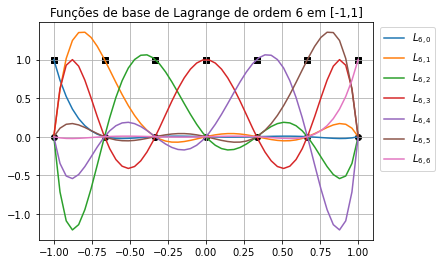

In [3]:
import numpy as np
import matplotlib.pyplot as plt 

# número de nós de interpolação: interpolação de (n-1)-ésimo grau
n = 7

# domínio de interpolação
x0,x1 = -1,1

# constroi vetor simbolico em x
X = symbolic_vector(n,'x')

# constroi pontos numericos 
xp = np.linspace(x0,x1,num=n,endpoint=True)

# cria malha numérica
xv = np.linspace(x0,x1)

# matriz das funções
Y = np.zeros((n,len(xv)))
for i in range(0,n):
    Y[i,] = np.zeros(np.shape(xv))

# montagem de dict para substituição: [xk,x0,x1,x2,...]
k = [str(i) for i in X]
k.insert(0,'x')

# preenche matriz
for i in range(0,Y.shape[0]):
    for j in range(0,np.size(xv)):
        v = list(np.concatenate([np.asarray([xv[j]]),xp]))
        d = dict(zip(k,v))
        Y[i,j] = L_nj(X,i).subs(d)

# plotagem das funções

leg = []
for i in range(0,Y.shape[0]):
    plt.plot(xv,Y[i,])    
    s = '$L_{' + str(n-1) + ',' + str(i) + '}$'
    leg.append(s)

plt.grid() 

# nós 
plt.scatter(xp,np.zeros(xp.shape),c= 'k')
plt.scatter(xp,np.ones(xp.shape),c='k',marker='s')
        
       
plt.legend(leg,loc='best',bbox_to_anchor=(0.7, 0.5, 0.5, 0.5))
plt.title('Funções de base de Lagrange de ordem ' + str(n-1) + ' em ['+str(x0)+','+str(x1)+']');